```
[Title] Classification using Decision Tree with Gini Impurity
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents] 
 - Gini Impurity for FDC Parameter
```

In [22]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

features = np.array([
    [150,  80, 50],
    [155,  83, 55],
    [156,  75, 60],
    [149,  90, 65],
    [157,  95, 45],
    [145, 100,44],
    [148,  90, 55],
])

labels = np.array([
    [0], 
    [1], 
    [1], 
    [0],
    [1],
    [0],
    [0]])

X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=42,
)

clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
clf.feature_importances_ # [ 1.,  0.,  0.]
clf.score(X=X_test, y=y_test) # 1.0

1.0

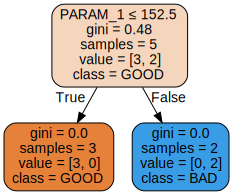

In [23]:
dot_data = tree.export_graphviz(
    clf,
    out_file=None, 
    feature_names=['PARAM_1', 'PARAM_2', 'PARAM_3'],  
    class_names=['GOOD', 'BAD'],  
    filled=True, 
    rounded=True,  
    special_characters=True
)
# conda install -c anaconda graphviz 
import graphviz
graph = graphviz.Source(dot_data)  
graph

In [24]:
# Copied verbatim from Josh Gordon of Google, 
# https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb

def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

# 3 players > 20, # 3
gini([[0], [0], [0], [1], [1], [1]]) # 0.5

# everyone over 20
gini([[1], [1], [1], [1], [1], [1]]) # 0

0.0